
# Recursive feature elimination with cross-validation

A Recursive Feature Elimination (RFE) example with automatic tuning of the
number of features selected with cross-validation.


## Data generation

We build a classification task using 3 informative features. The introduction
of 2 additional redundant (i.e. correlated) features has the effect that the
selected features vary depending on the cross-validation fold. The remaining
features are non-informative as they are drawn at random.



In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)

## Model training and selection

We create the RFE object and compute the cross-validated scores. The scoring
strategy "accuracy" optimizes the proportion of correctly classified samples.



### Math Explanation for Recursive Feature Elimination with Cross-Validation (RFECV)

The `RFECV` class in `scikit-learn` is a feature selection method that recursively eliminates features and uses cross-validation to find the optimal number of features. The main goal is to select the most relevant subset of features that maximizes the model's performance.

#### Process Overview

1. **Initial Model Fitting**:
   - Fit the estimator on the initial set of features.
   - Evaluate the model performance using cross-validation.

2. **Feature Ranking**:
   - Rank the features based on their importance weights provided by the estimator (e.g., coefficients in a linear model).

3. **Feature Elimination**:
   - Remove the least important feature(s) based on the ranking.
   - Refit the model and evaluate performance using cross-validation.

4. **Recursive Process**:
   - Repeat the ranking and elimination steps until the specified minimum number of features is reached.

5. **Cross-Validation**:
   - During each iteration, cross-validation is used to evaluate the model performance.
   - The average performance score is recorded for each feature subset.

6. **Optimal Feature Selection**:
   - The feature subset with the highest cross-validation score is selected as the optimal set.
   - The number of features in this subset is the optimal number of features.

#### Step Parameter

The `step` parameter in `RFECV` determines the number of features to remove at each iteration of the feature elimination process. 

- **Mathematically**:
  - If `step = 1`, one feature is removed at each iteration.
  - If `step = n`, `n` features are removed at each iteration.

The choice of the `step` parameter affects the granularity of the feature elimination process. Smaller values of `step` allow for a more detailed search for the optimal number of features, while larger values speed up the process by removing multiple features at once.

#### Mathematical Computations

For each iteration:
1. **Fit the Estimator**:
   - Compute the model parameters (e.g., coefficients for `LogisticRegression`) using the current set of features.
   
2. **Compute Feature Importance**:
   - Determine the importance of each feature. For logistic regression, this is typically based on the absolute values of the coefficients.

3. **Eliminate Features**:
   - Identify and remove the least important feature(s) based on the `step` parameter.

4. **Cross-Validation**:
   - Split the data into $k$ folds (using `StratifiedKFold` to maintain class balance).
   - For each fold:
     - Train the model on the training set.
     - Evaluate the model on the validation set.
   - Calculate the average performance score (e.g., accuracy) across all folds.

5. **Selection of Optimal Features**:
   - The subset of features that yields the highest average cross-validation score is selected.
   - The corresponding number of features is recorded.

#### Example

Given the provided code:

```python
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")


In [4]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 3


In the present case, the model with 3 features (which corresponds to the true
generative model) is found to be the most optimal.

## Plot number of features VS. cross-validation scores



In [9]:
rfecv.n_features_

3

Optimal number of features: 3


AttributeError: 'RFECV' object has no attribute 'grid_scores_'

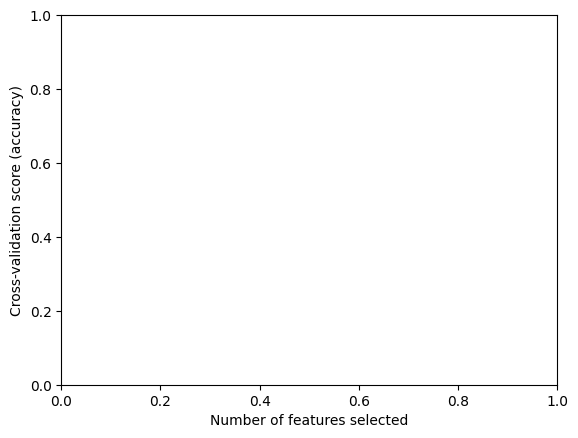

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [6]:
cv_results

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.218,0.037630,0.22,0.19,0.17,0.23,0.28
1,0.368,0.040200,0.35,0.39,0.36,0.31,0.43
2,0.604,0.058856,0.59,0.58,0.56,0.57,0.72
3,0.602,0.059800,0.59,0.57,0.56,0.57,0.72
4,0.600,0.060332,0.58,0.57,0.56,0.57,0.72
5,0.578,0.066753,0.53,0.56,0.55,0.54,0.71
6,0.552,0.069685,0.53,0.52,0.52,0.50,0.69
7,0.548,0.061123,0.52,0.52,0.52,0.51,0.67
8,0.542,0.049153,0.52,0.52,0.51,0.52,0.64
9,0.528,0.048744,0.48,0.51,0.53,0.50,0.62


From the plot above one can further notice a plateau of equivalent scores
(similar mean value and overlapping errorbars) for 3 to 5 selected features.
This is the result of introducing correlated features. Indeed, the optimal
model selected by the RFE can lie within this range, depending on the
cross-validation technique. The test accuracy decreases above 5 selected
features, this is, keeping non-informative features leads to over-fitting and
is therefore detrimental for the statistical performance of the models.

